In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
import gensim

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/corpus_100k.zip -d .

Archive:  /content/drive/MyDrive/corpus_100k.zip
  inflating: ./corpus_100k           


In [4]:
corpus = open('corpus_100k').readlines()

In [ ]:
corpus

In [6]:
sentences = [s.strip().split(' ') for s in corpus]

In [ ]:
sentences[0]

In [8]:
for s in sentences:
  for i in ',՞.;֊՛՝-»«':
    if i in s:
      s.remove(i)

In [ ]:
sentences[0]

In [10]:
dct = gensim.corpora.Dictionary(sentences)

word2idx = dct.token2id
idx2word = [dct[i] for i in range(len(dct.token2id))]
inv_vocab = {i:w for i,w in enumerate(idx2word)}

In [11]:
word2idx = dct.token2id

In [ ]:
word2idx

In [22]:
vocab_size = len(idx2word)
vocab_size

393582

In [19]:
skip_grams = []
win_size = 2
for i in range(win_size, vocab_size-win_size):
  input = idx2word[i]
  context = [idx2word[j] for j in range(i-win_size,i+win_size+1) if idx2word[j] != input]

  for w in context:
    skip_grams.append([word2idx[input], word2idx[w]])


In [ ]:
skip_grams

In [21]:
input, label = zip(*skip_grams)

In [ ]:
# def negative_sampling(input_y, context_y, num_sample=4):
#   context_class = np.reshape(input_y, (1,1))
#   negative_sampling_candidates, _, _ = tf.random.log_uniform_candidate_sampler(
#     true_classes=context_class,  # class that should be sampled as 'positive'
#     num_true=1,  # each positive skip-gram has 1 positive context class
#     num_sampled=num_sample,  # number of negative context words to sample
#     unique=True,  # all the negative samples should be unique
#     range_max=vocab_size,  # pick index of the samples from [0, vocab_size]
#     seed=14)
#   idx = negative_sampling_candidates.numpy()

#   cmp1 = np.log(1/(1+np.exp(-input_y*context_y)))
#   cmp2 = 0
#   for i in idx:
#     cmp2 += np.log(1/(1+np.exp(input_y*inv_vocab[i])))

#   return -(cmp1 + cmp2)

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Input, Embedding, Flatten

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=32))
model.add(Dense(50))
model.add(Dense(vocab_size, activation='softmax'))

In [24]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')

In [36]:
history = model.fit(input, label, epochs=40, batch_size=128)

In [35]:
# plt.plot(history.history['loss'])
# plt.show()

In [27]:
model.save('/content/drive/MyDrive/model.h5')

In [ ]:
# my_model = tf.keras.saving.load_model('/content/drive/MyDrive/model.h5')

In [28]:
weights = model.get_weights()[0]

word_embedding = {}
for i in idx2word:
  word_embedding[i] = weights[word2idx[i]]

In [29]:
words = []
vectors = []
for word in idx2word:
    words.append(word)
    vectors.append(word_embedding[word])

In [30]:
vectors = np.array(vectors)
vectors.shape

(393582, 32)

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)
reduced_vectors.shape

(393582, 2)

In [32]:
word_embedding_2d = {}
for w in idx2word:
  word_embedding_2d[w] = reduced_vectors[word2idx[w]]

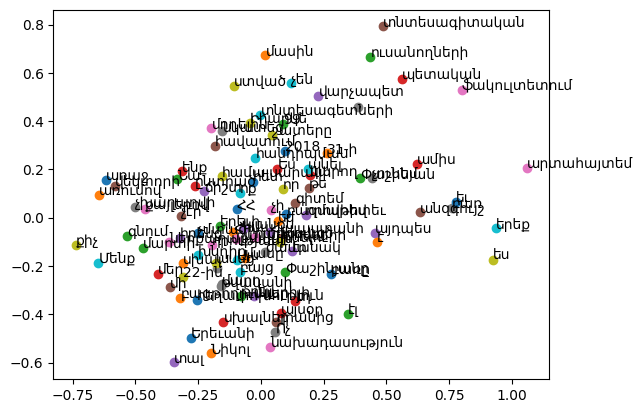

In [34]:
for word in idx2word[:100]:
  coordinates = word_embedding_2d[word]
  plt.scatter(coordinates[0], coordinates[1])
  plt.annotate(word, (coordinates[0], coordinates[1]))